# Geodatenanalyse 2


## Termin 3 - Modul 2

## Frequenzanalyse von Zeitreihen: Wichtige Eigenschaften der Fourier Analyse

Ca. 20-30 Minuten

## Inhalt
- Zusammenhang zwischen Zeitdauer und Frequenzauflösung
- Maximale Frequenzauflösung
- Der Leck-Effekt
- Fensterfunktionen
- Anwendung des Von-Hann Fensters auf die Meeresspiegel-Zeitreihe
- Weitere Methden der Frequenzanalyse

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Zusammenhang zwischen Zeitdauer und Frequenzauflösung

- Die Frequenzauflösung der FFT ist ein sehr wichtiges Kriterium

- Sie bestimmt, wie genau man Frequenzkomponenten identifizieren kann

### Frequenzauflösung

$\Delta F_t = \frac{f_{t}}{N} = \frac{1}{\Delta f_t N} = \frac{1}{T}$


$\Delta F_t$: Periode in der Frequenzdomaine

$f_{t}$: Sampling-Frequenz in der Zeitdomäne

$N$: Anzahl der Werte in der Zeitdomäne

$\Delta f_t$: Periode in der Zeitdomäne

$T$: Dauer der Zeitreihe  in der Zeitdomäne

**Wichtig**: Die Frequenzauflösung ist nur von der Zeitdauer in der Zeitdomäne abhängig und nicht von der Abtastfrequenz in der Zeitdomäne

### Beispiel

Im Folgenden wird der Einfluss der Länge einer Zeitreiheauf die Frequenzauflösung illustriert:

In [5]:
time = np.linspace(0, 5, 5*96, endpoint=True)
freq1 = 1
amp1 = 1
comp1 = amp1 * np.cos(time*2*np.pi*freq1)
freq2 = 0.5
amp2 = 3
comp2 = amp2 * np.cos(time*2*np.pi*freq2)
freq3 = 2
amp3 = 2
comp3 = amp3 * np.cos(time*2*np.pi*freq3)
comp_sum1 = comp1 + comp2 + comp3

In [6]:
N = len(comp_sum1)
T = 96
data_fft1 = np.fft.fft(comp_sum1)[0:int(N/2)]
freq1 = np.fft.fftfreq(N, d=1/T)[0:int(N/2)]
amplitude1 = (2/N)*np.abs(data_fft1)

In [7]:
time = np.linspace(0, 10, 10*96, endpoint=True)
freq1 = 1
amp1 = 1
comp1 = amp1 * np.cos(time*2*np.pi*freq1)
freq2 = 0.5
amp2 = 3
comp2 = amp2 * np.cos(time*2*np.pi*freq2)
freq3 = 2
amp3 = 2
comp3 = amp3 * np.cos(time*2*np.pi*freq3)
comp_sum2 = comp1 + comp2 + comp3

In [8]:
N = len(comp_sum2)
T = 96
data_fft2 = np.fft.fft(comp_sum2)[0:int(N/2)]
freq2 = np.fft.fftfreq(N, d=1/T)[0:int(N/2)]
amplitude2 = (2/N)*np.abs(data_fft2)

ValueError: x and y must have same first dimension, but have shapes (1,) and (240,)

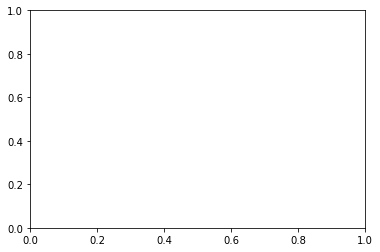

In [9]:
plt.plot(freq1, amplitude1, 'r.', label='Zeitdauer 5 Tage')
plt.plot(freq2, amplitude2, 'b.', label='Zeitdauer 10 Tage')

plt.xlabel('Frequenz (cpd)')
plt.ylabel('Amplitude [Einheit]')
plt.xlim(0,2.5)
plt.legend()
plt.show()

**FAZIT**: Je länger die Zeitreihe, desto besser die Auflösung von einzelnen Frequenzkomponenten!

## Maximale Frequenzauflösung

Das obere Frequenzlimit der FFT bestimmt die Obergrenze von detektierbaren Frequenzen

### Die Nyquist-Frequenz

Die Obergrenze von detektierbaren Frequenzen ist die sogenannte Nyquist-Frequenz:

$F_{Nyquist} = \frac{f_t}{2}$

$f_{t}$: Sampling-Frequenz in der Zeitdomäne

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Komplexe_Zahl)

<img src="figures\nyquist.png" alt="alt text" width="400" align="left"/>

**Beispiel**: Siehe [Passing the Nyquist Limit by Jack Schaedler](https://jackschaedler.github.io/circles-sines-signals/sampling2.html)

**FAZIT**: Für die Bestimmung von Frequenzen muss die Samplingrate in der Zeitdomäne beachtet werden!

## Der Leck-Effekt

- Die DFT nimmt an, das Frequenzkomponenten zeitlich kontinuierlich (d.h., unendlich lang) sind

- Das bedeutet, dass Frequenzen, welche nicht genau in die Zeitdauer passen eine Diskontinuität hervorrufen

- Diese Diskontinuität führt zum sogenannten **Leck-Effekt**


### Beispiel zum Leck-Effekt

In [ ]:
time = np.linspace(0, 10, 10*96, endpoint=True)
freq1 = 1
amp1 = 1
comp1 = amp1 * np.cos(time*2*np.pi*freq1)
freq2 = 0.45
amp2 = 2
comp2 = amp2 * np.cos(time*2*np.pi*freq2)
comp_sum = comp1 + comp2

In [ ]:
N = len(comp_sum)
T = 96
data_fft = np.fft.fft(comp_sum)[0:int(N/2)]
freq = np.fft.fftfreq(N, d=1/T)[0:int(N/2)]
amplitude = (2/N)*np.abs(data_fft)

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16, 4))

ax[0].plot(time, comp1, 'r', lw=1, label='Component 1')
ax[0].plot(time, comp2, 'b', lw=1, label='Component 2')
ax[0].plot(time, comp_sum, 'k', lw=2, label='Component 2')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Signal')

ax[1].axvline(0.45)
ax[1].axvline(1)
ax[1].plot(freq, amplitude, 'k.', label='Zeitdauer 10 Tage')
ax[1].set_xlim(0.2, 1.3)
ax[1].set_xlabel('Frequency [cpd]')
ax[1].set_ylabel('Amplitude')

plt.show()

Quelle: [Wikipedia](https://de.wikipedia.org/wiki/Leck-Effekt)

<img src="figures\FFT_leck.png" alt="alt text" width="600" align="left"/>

**Beispiel**: Siehe [The Phenomenon of Leakage](https://jackschaedler.github.io/circles-sines-signals/dft_leakage.html)

**FAZIT**: Der Leck-Effekt kann minimiert werden durch:
- eine Anpassung der Datenlänge in der Zeitdomäne, 
- durch die Verwendung einer Fensterfunktion

## Fensterfunktionen

- Die Berechnung der DFT für eine Zeitreihe entspricht immer einem Rechteckfenster

- Das Rechteckfenster ist genauso lang wie die Dauer der Zeitreihe 

- Es können auch andere Fensterfunktionen verwendet werden

- Diese können auf bestimmte Kriterien ausgerichtet werden

- Zum Beispiel kann man Diskontinuitäten vermeiden

### Beispiel: Vergleich von Rechteck und Hanning Fenster

Das **Von-Hann** (oder auch **Hanning**) Fenster ist sehr beliebt:
    
$w(n) = \frac{1}{2} \left[ 1 + cos \left( \frac{2 \pi n}{M - 1} \right) \right]$

$w(n)$ ist das Gewicht für den Wert $n$

$M$ ist die Anzahl der Werte

<img src="figures\windowing.png" alt="alt text" width="800" align="left"/>

**FAZIT**

Ein Fenster:
        
- ... kann den Leck-Effekt verringern, aber niemals ganz beheben

- ... beeinflusst das Signal, und das Spektrum muss deshalb kompensiert werden (Amplitudenfaktor für Hanning ~ 2)

- ... muss auf die individuellen Umstände agepasst werden

**Hinweis**: Es gibt sehr viele Fenster mit unterschiedlichen Eigenschaften, siehe auch [Fensterfunktion auf Wikipedia](https://de.wikipedia.org/wiki/Fensterfunktion)



## Anwendung des *Von-Hann* Fensters auf die Meeresspiegel Zeitreihe

In [ ]:
sea_level = pd.read_csv('data/Palau_sea-level.csv', parse_dates=True, index_col='Datetime[GMT]')
sea_level

In [ ]:
# the rectangular window
N = len(sea_level)
T = 24

data_fft = np.fft.fft(sea_level['Sea level [mm]'])
data_fft = data_fft[0:int(N/2)]

freq = np.fft.fftfreq(N, d=1/T)
freq = freq[0:int(N/2)]

amp_rect = (2/N)*np.abs(data_fft)

In [ ]:
# the Hanning window
N = len(sea_level)
T = 24

# generate the window
hanning_data = np.hanning(N)*sea_level['Sea level [mm]']

data_fft = np.fft.fft(hanning_data)
data_fft = data_fft[0:int(N/2)]

freq = np.fft.fftfreq(N, d=1/T)
freq = freq[0:int(N/2)]

amp_hann = 2*(2/N)*np.abs(data_fft)

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(freq[1:], amp_rect[1:], 'b.', label='Rectangular window')
ax.plot(freq[1:], amp_hann[1:], 'r.', label='Hanning window')
ax.set_xlabel('Frequenz (cpd)')
ax.set_ylabel('Amplitude [mm]')
ax.set_xlim(1.85, 2.05)
ax.set_ylim(-10, 600)

## Weitere Methoden der Frequenanalyse

- Frequenzanalyse ist ein eigenes Feld der Signalverarbeitung

- Dies erfordert ein eigenes Lehrmodul

- DFT ist sehr gut etabliert und beliebt

- Die DFT ist aber nur eine von vielen Möglichkeiten zur Frequenzanalyse von Zeitreihen

- Neuere Methoden sind mathematisch komplizierter



## ENDE